In [ ]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Metadata Information**

In [ ]:
covid_imgs = pd.read_excel("/content/drive/MyDrive/all_images/COVID.metadata.xlsx")
covid_imgs.head(2)

FILE NAME FORMAT     SIZE                                                URL
0   COVID-1    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
1   COVID-2    PNG  256*256  https://sirm.org/category/senza-categoria/covi...

In [ ]:

opacity_images = pd.read_excel("/content/drive/MyDrive/all_images/Normal.metadata.xlsx")
opacity_images.head(2)

FILE NAME FORMAT     SIZE                                                URL
0  NORMAL-1    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
1  NORMAL-2    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...

In [ ]:
#Working with the images

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Covid X Ray Data"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "/content/drive/MyDrive/All_images"

In [ ]:
import fnmatch
type = ['COVID','Normal']
counter =[]
for x in type:
  dir_path = f'/content/drive/MyDrive/Covid X Ray Data/{x}/images'
  count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
  counter.append(count)
  print(x, 'Images:', count)

COVID Images: 2929
Normal Images: 6893


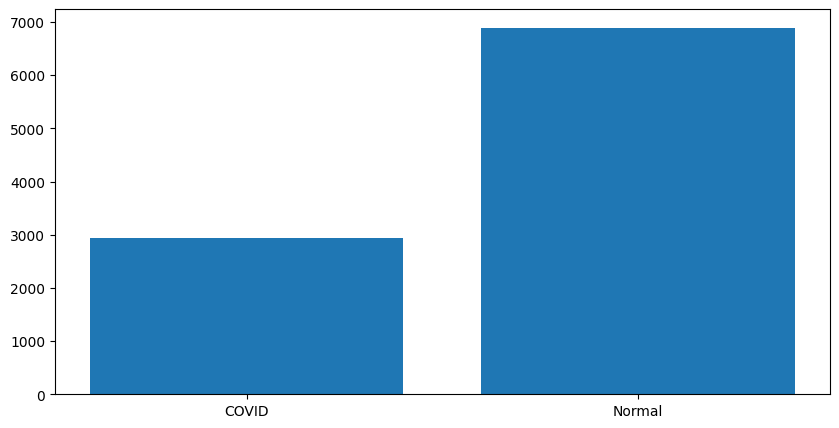

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x = type, height= counter)
plt.show()

In [ ]:
"""#Creating the folder

if not os.path.exists(NEW_DIR+"train_test_split/"):


  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 2500 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 2900 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[3]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)
    # Validation Data
  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(ROOT_DIR+imgs[3]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(ROOT_DIR+imgs[3]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)"""


'#Creating the folder\n\nif not os.path.exists(NEW_DIR+"train_test_split/"):\n\n\n  os.makedirs(NEW_DIR+"train_test_split/")\n\n  os.makedirs(NEW_DIR+"train_test_split/train/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/train/Covid")\n\n  os.makedirs(NEW_DIR+"train_test_split/test/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/test/Covid")\n\n  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")\n\n\n  # Train Data\n  for i in np.random.choice(replace= False , size= 2500 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):\n    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )\n    os.remove(i)\n\n  for i in np.random.choice(replace= False , size= 2900 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):\n    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )\n    os.remove(i)\n\n  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[3]+"/images/*") ):\n    shutil.copy(i , NEW_D

In [ ]:
train_path  = "/content/drive/MyDrive/all_images/train"
valid_path  = "/content/drive/MyDrive/all_images/validation"
test_path   = "/content/drive/MyDrive/all_images/test"

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras


In [ ]:
#ImageDataGenerator is used for data augmentation and here we are using the data augmentation technique
#as preprocessing function as vgg16.preprocess_input which is used to preprocess the image that aligns
#with the preprocessing used during the training of  vgg16 model
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))


Found 5000 images belonging to 2 classes.


In [ ]:


validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 800 images belonging to 2 classes.


In [ ]:

test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
test= test_data_gen.flow_from_directory(directory= test_path , target_size=(224,224))


Found 800 images belonging to 2 classes.


In [ ]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
# to visualize the images in the traing data generator as next returns the next images train

t_img , label = train.next()

In [ ]:
# function when called will plot the images

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

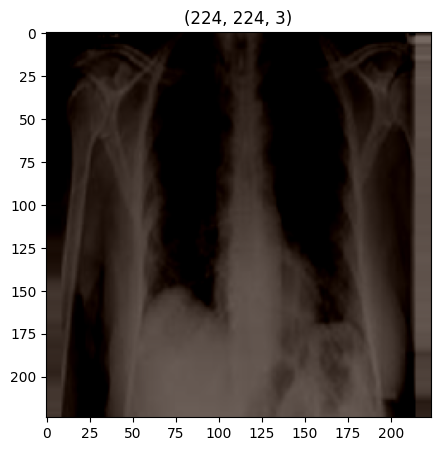

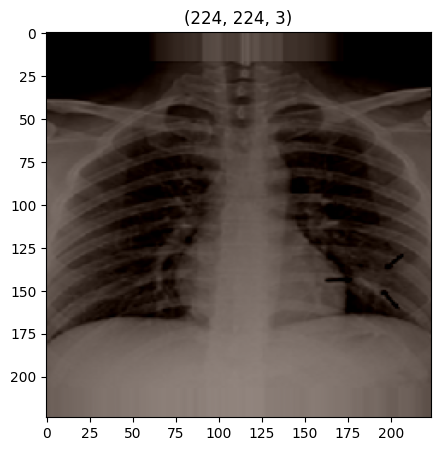

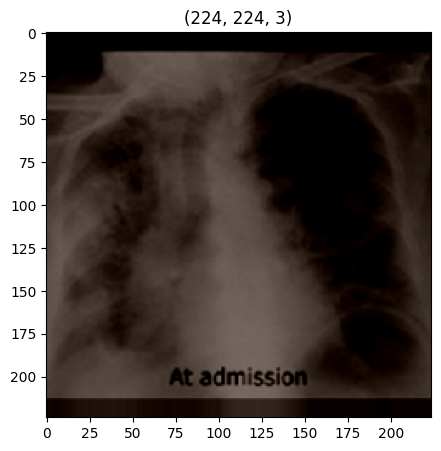

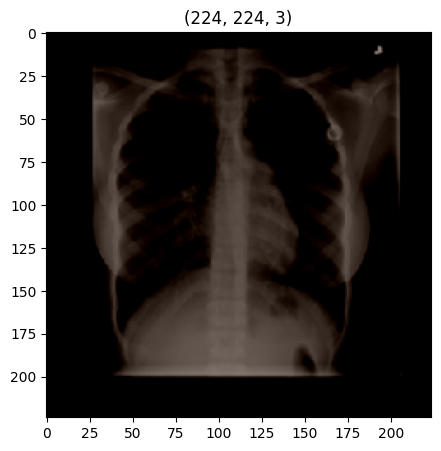

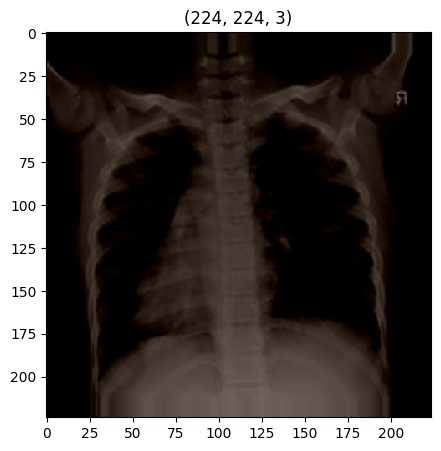

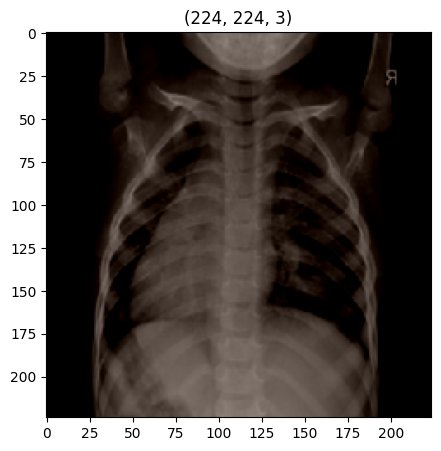

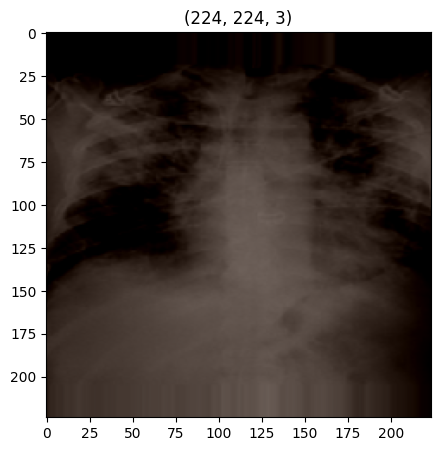

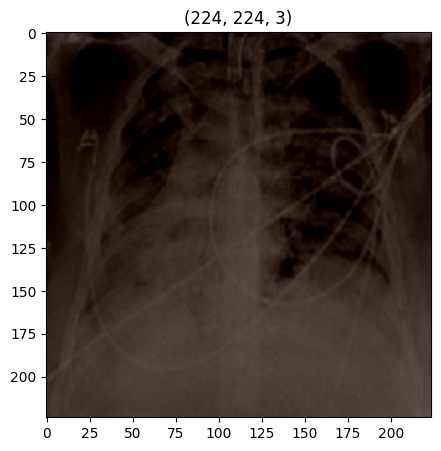

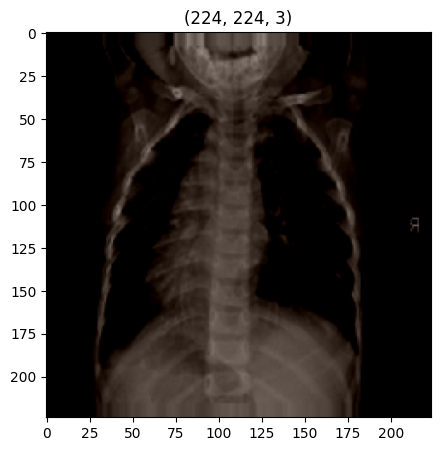

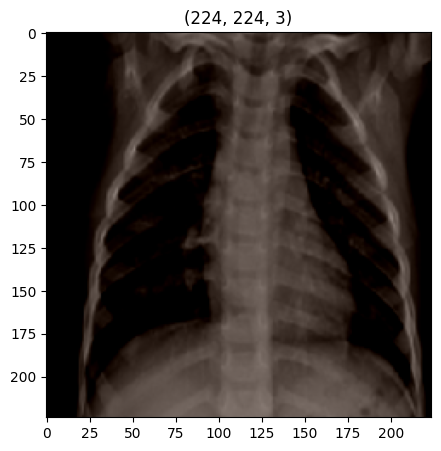

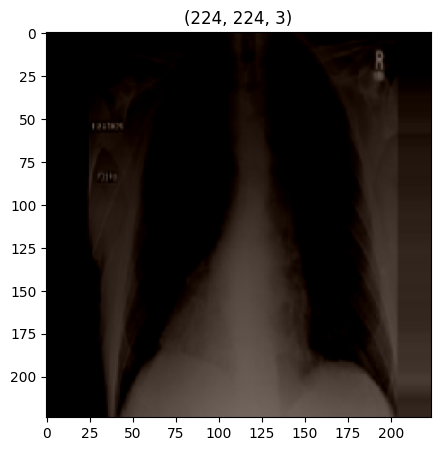

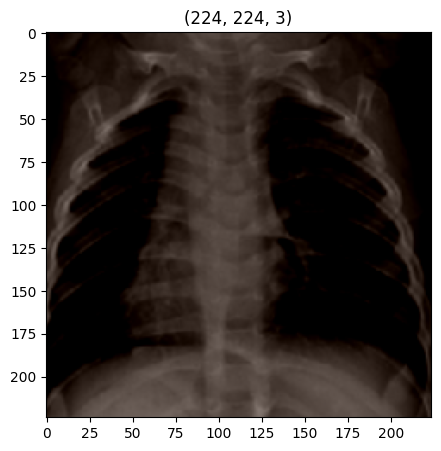

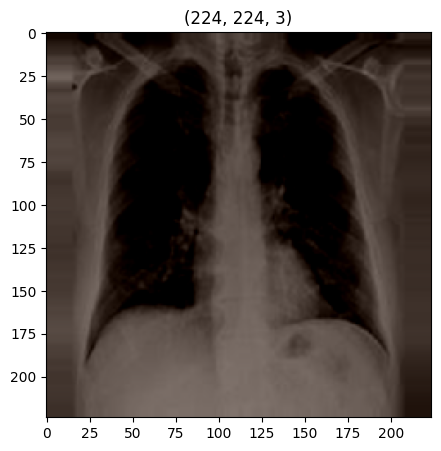

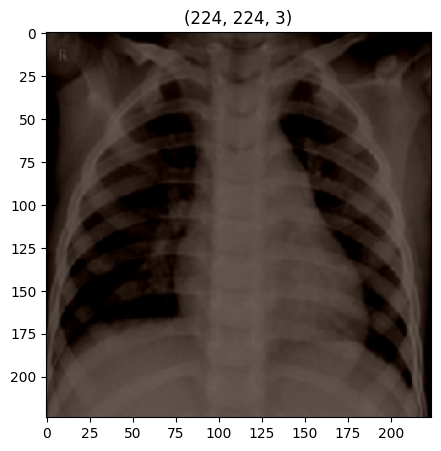

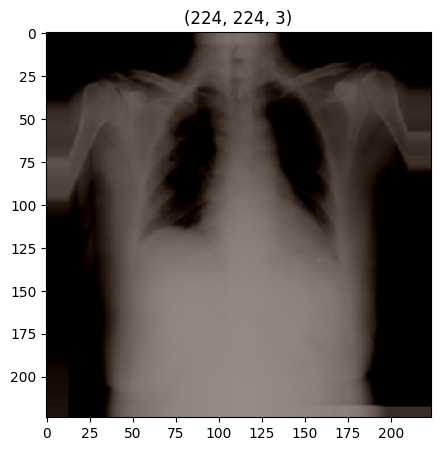

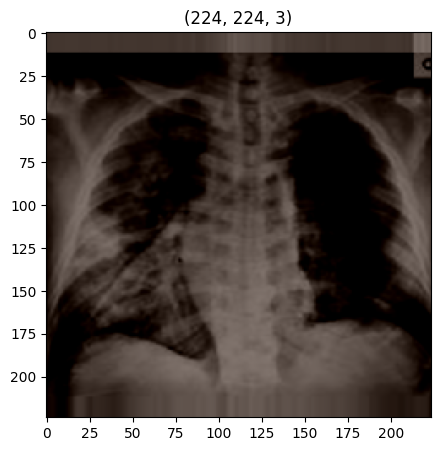

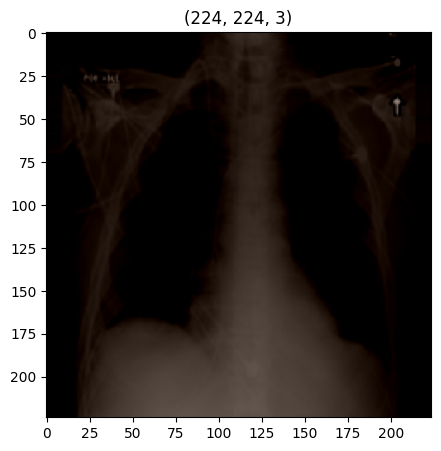

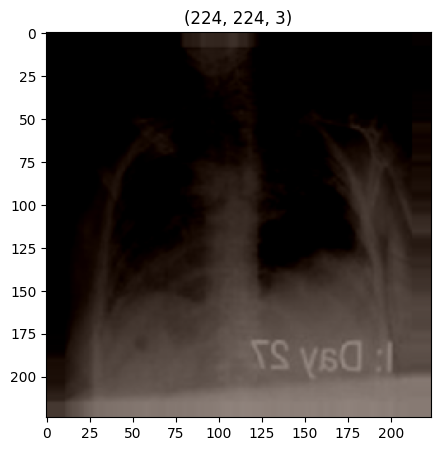

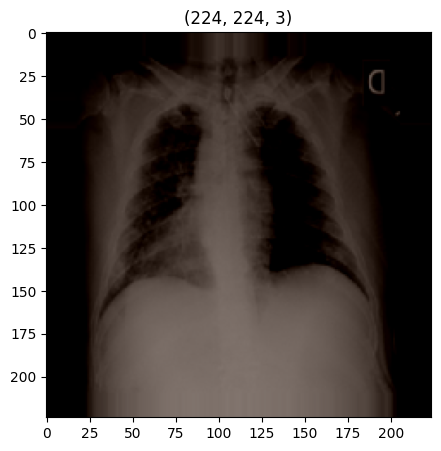

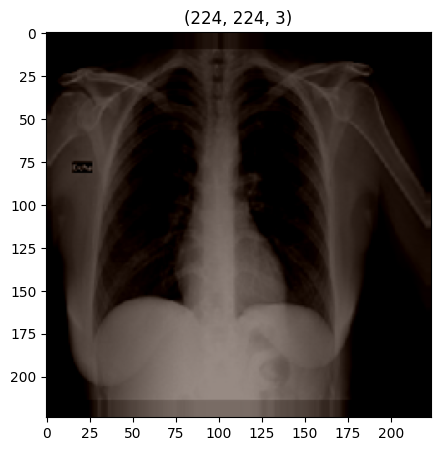

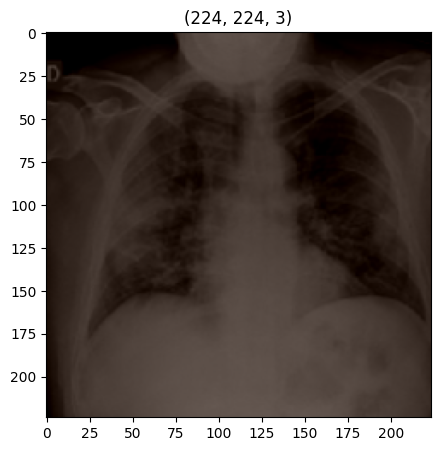

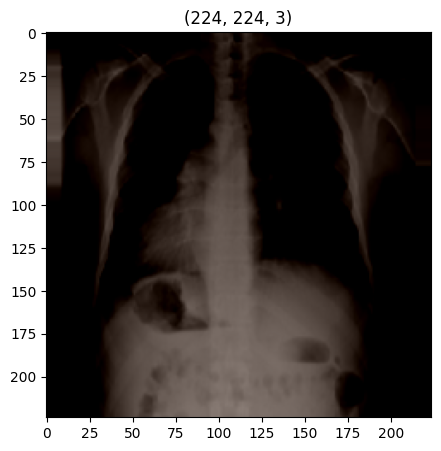

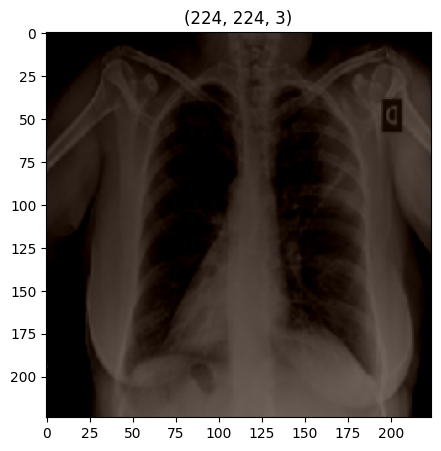

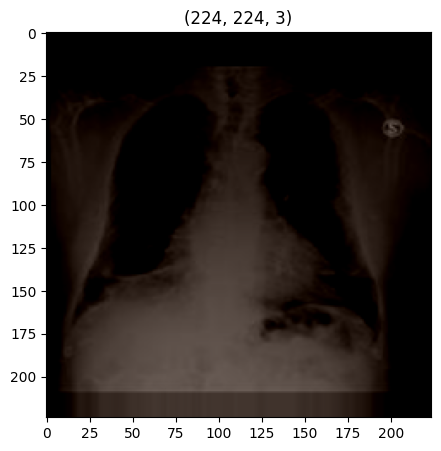

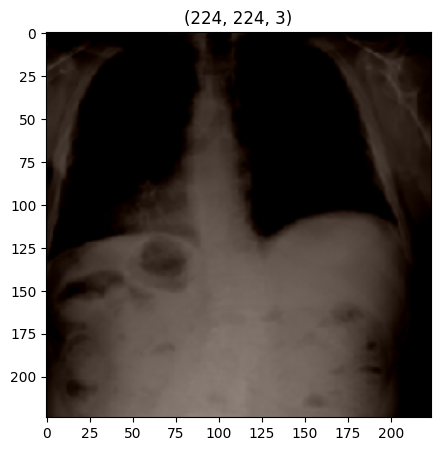

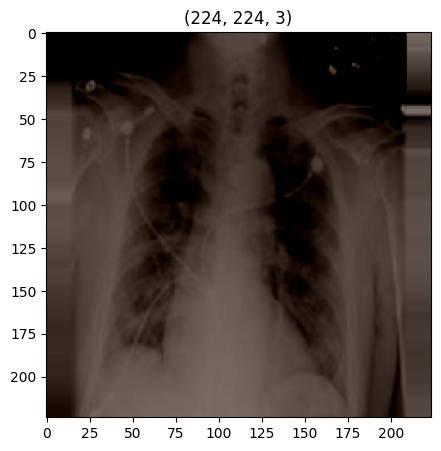

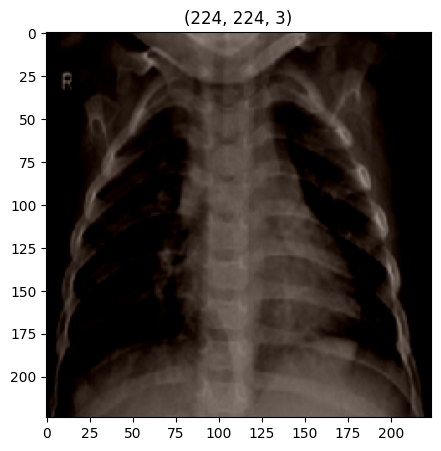

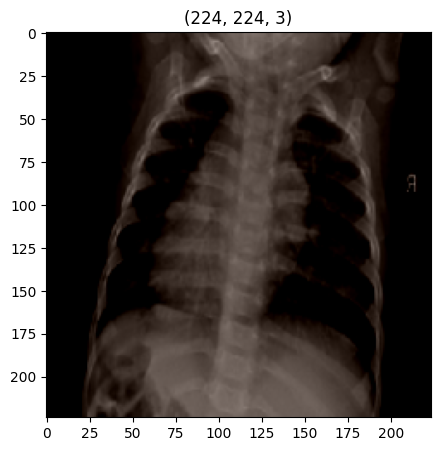

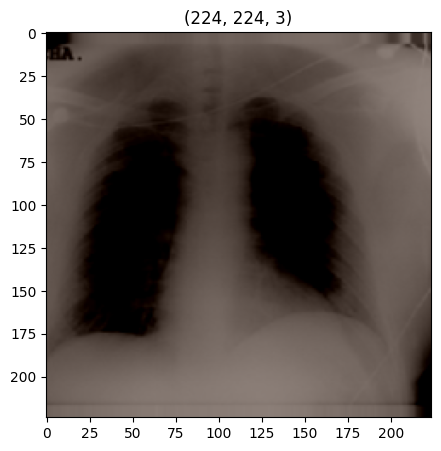

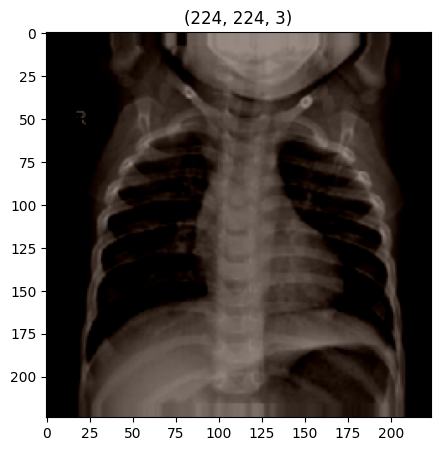

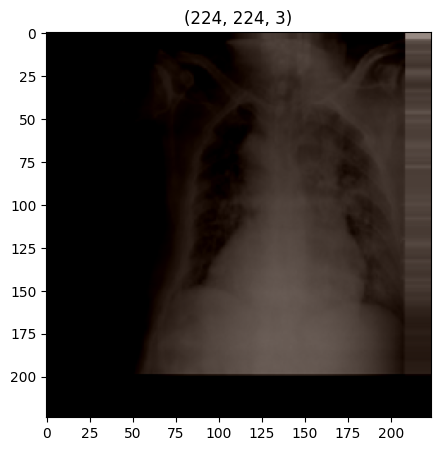

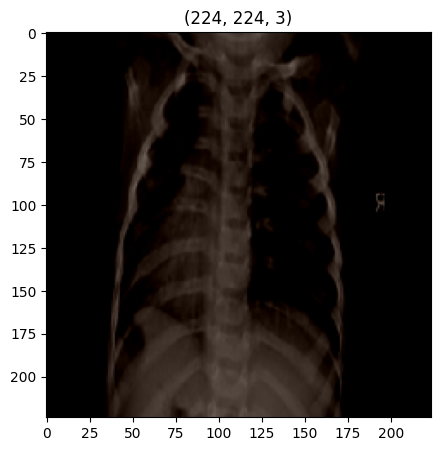

In [ ]:
# function call to plot the images

plotImages(t_img, label)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
# include_top will consider the new weights and not include the dense layer
vgg = VGG16( input_shape=(224,224,3), include_top= False)

In [ ]:
# Dont Train the parameters again of the convolutional layers
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
#hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 8, validation_data= valid , validation_steps= 32)
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 20, validation_data= valid , validation_steps= 10, callbacks=[es,mc])

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.7344 
Epoch 1: val_accuracy improved from -inf to 0.65000, saving model to bestmodel.h5
10/10 [==============================] - 510s 50s/step - loss: 0.5680 - accuracy: 0.7344 - val_loss: 0.6777 - val_accuracy: 0.6500
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.3841 - accuracy: 0.8438 
Epoch 2: val_accuracy improved from 0.65000 to 0.72812, saving model to bestmodel.h5
10/10 [==============================] - 470s 50s/step - loss: 0.3841 - accuracy: 0.8438 - val_loss: 0.5639 - val_accuracy: 0.7281
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.3308 - accuracy: 0.8813 
Epoch 3: val_accuracy improved from 0.72812 to 0.74375, saving model to bestmodel.h5
10/10 [==============================] - 469s 50s/step - loss: 0.3308 - accuracy: 0.8813 - val_loss: 0.5434 - val_accuracy: 0.7437
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.

In [ ]:
## load only the best model
from keras.models import load_model
model = load_model("bestmodel.h5")


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

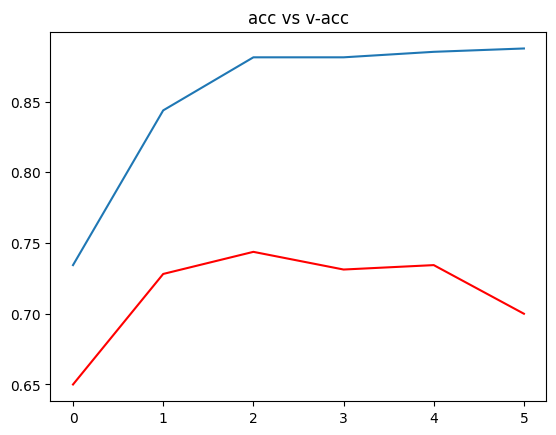

In [ ]:
plt.plot(h['accuracy'],label = "train-accuracy")
plt.plot(h['val_accuracy'] ,label="val_accuracy", c = "red")
plt.title("acc vs v-acc")
plt.show()

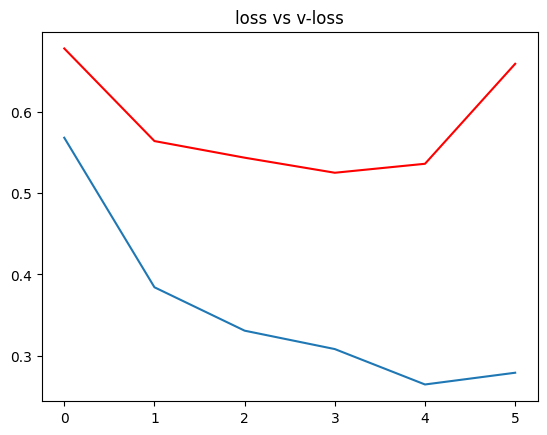

In [ ]:
plt.plot(h['loss'],label = "train-loss")
plt.plot(h['val_loss'] , c = "red",label="val_loss")
plt.title("loss vs v-loss")
plt.show()


In [ ]:

#checking out the accuracy of our model

acc = model.evaluate_generator(generator= test)[1]

print(f"The accuracy of your model is = {acc} %")


The accuracy of your model is = 0.762499988079071 %


In [ ]:
import keras.utils as image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 1s 753ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 1s 568ms/step
The chances of image being Covid is : 67.60275959968567 percent

1/1 [==============================] - 1s 570ms/step
The chances of image being Normal is : 55.171358585357666 percent


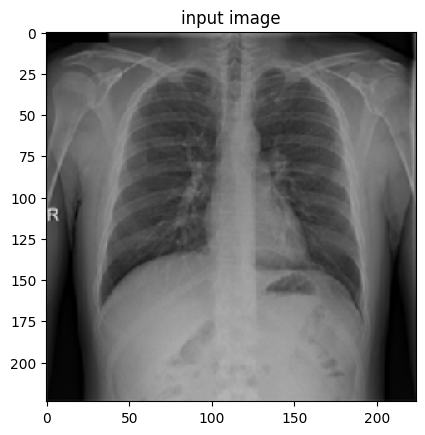

In [ ]:
import keras.utils as image
path = "/content/drive/MyDrive/all_images/test/covid/COVID-2651.png"
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [ ]:

import tensorflow as tf

In [ ]:

# this function is udes to generate the heat map of aan image


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:

import matplotlib.cm as cm

from IPython.display import Image, display
from keras.utils import load_img, img_to_array,array_to_img

In [ ]:
 #put the heatmap to our image to understand the area of interest

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = keras.utils.load_img(img_path)
    img = img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))



In [ ]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """



  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()


1/1 [==============================] - 1s 1s/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 1s 1s/step
The chances of image being Covid is : 93.41133236885071 %
1/1 [==============================] - 1s 964ms/step
The chances of image being Normal is : 8.424745500087738 %

image with heatmap representing the covid spot


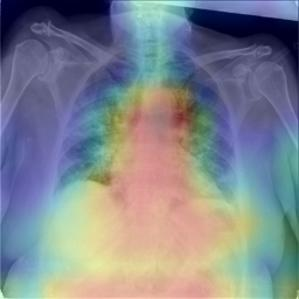


the original input image



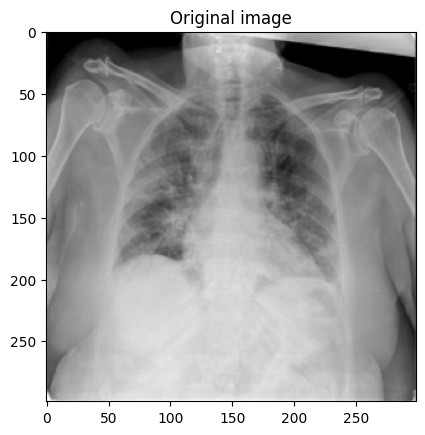

In [ ]:

#predictions
# provide the path of any image from google or any other scource
# the path is already defigned above , but you can also provide the path here to avoid scrolling up

# for covid image :
path = "/content/drive/MyDrive/all_images/test/covid/COVID-2501.png"

image_prediction_and_visualization(path)


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test.classes, y_pred)

25/25 [==============================] - 535s 21s/step


In [ ]:
cm

array([[230, 170],
       [214, 186]])

<Axes: >

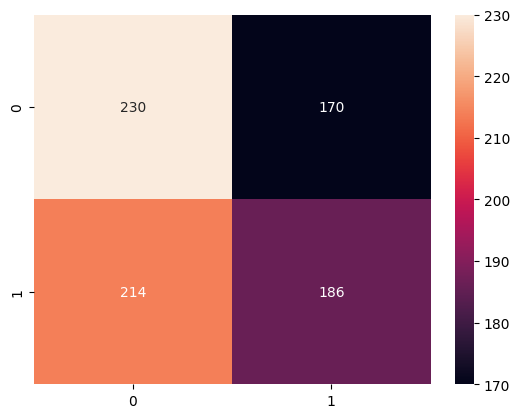

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test.classes, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.57      0.55       400
           1       0.52      0.47      0.49       400

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800

